In [1]:
# imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Carregando o Dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(11000, 12)

In [4]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [7]:
# Variáveis numéricas
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']

In [8]:
cats = ['corredor_armazem',
        'modo_envio',
        'prioridade_produto',
        'genero']

In [9]:
target = df['entregue_no_prazo']

In [10]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [11]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [12]:
target.value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

## Limpeza de Dados

### Tratamento de Valores Ausentes
ATENÇÃO: Valor ausente significa ausência de informação e não ausência de dado!

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engeharia de Atributos. Mas fique atento: a Engenharia de Atributos e o Pré-processamento podem gerar dados ausentes, que prescisa ser tratado.

In [13]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [14]:
# Verifica se há valores ausentes
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de Valores Duplicados

Valores suplicados significam duplicidade dos dados em toda a linha (todo o registro).

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos.

In [15]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [16]:
## Analisa duas linhas completamente iguais, inclusive o ID
df.duplicated().sum()

0

### Tratamento de Valores Outliers

Leia o manual em pdf com a defninição do que é o z-score e a definição e valor outlier.

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engeharia de Atributos


In [17]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 11000


In [18]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [19]:
df['desconto'].mean()

13.372545454545454

In [20]:
df['desconto'].std()

16.20494287359407

<AxesSubplot:>

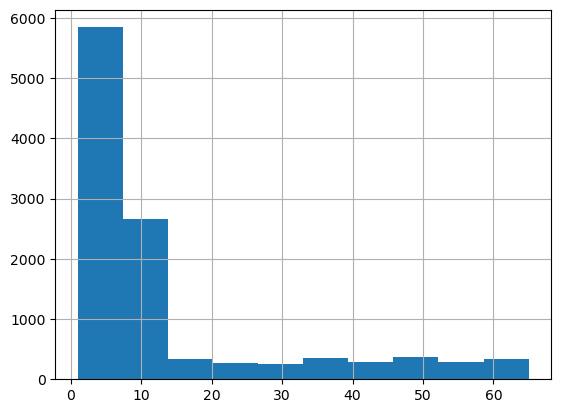

In [21]:
df['desconto'].hist()

In [22]:
# Calcula os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior
# O valor Z nos diz exatamente quantos desvios padrão se está longe da média, neste caso, nossos limites serão
# +3Z e -3Z.
# A estatística padrão fala que um valor passa a ser outlier quando está 3 vezes acima ou 3 vezes abaixo com relação
# a média

limite_superior = df['desconto'].mean() + 3 * df['desconto'].std()
print('Valor Superior:', limite_superior)
limite_inferior = df['desconto'].mean() - 3 * df['desconto'].std()
print('Valor Inferior:', limite_inferior)

Valor Superior: 61.987374075327665
Valor Inferior: -35.24228316623676


In [23]:
# Extraindo os valores outliers
df_outliers_desconto = df[(df['desconto'] <= limite_inferior) | (df['desconto'] >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [24]:
# Filtra o dataframe removendo os registros com outliers na coluna desconto
df = df[(df['desconto'] > limite_inferior) & (df['desconto'] < limite_superior)]

In [25]:
df.shape

(10819, 12)

In [26]:
registros = np.array([True] * len(df))

In [27]:
type(registros)

numpy.ndarray

In [28]:
np.count_nonzero(registros == True)

10819

In [29]:
np.count_nonzero(registros == False)

0

In [30]:
# Variáveis numéricas (sem a variável desconto, já foi tratada)
nums2 = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'peso_gramas']

In [31]:
# Loop por cada variável numérica
for col in nums2:
    
    # Calcula o z-score absoluto (stats faz parte do scipy)
    zscore = abs(stats.zscore(df[col]))
    
    # Mantém valores com menos de 3 z-score absoluto
    registros = (zscore < 3) & registros

In [32]:
np.count_nonzero(registros == True)

10643

In [33]:
np.count_nonzero(registros == False)

176

In [34]:
# Removemos registros com z-score abaixo de 3 nas colunas numéricas
df = df[registros]

In [35]:
df.shape

(10643, 12)

## Tratamento de Desbalanceamento de Classe

Deve ser feito nos dados de treino, após o pré-processamento dos dados.

In [36]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

### OBS: Devemos fazer somente nos dados de treino quando o modelo for treinado

## Engenharia de Atributos

### Feature Selection

Aqui tomamos as decisões sobre quais variáveis serão usadas na Engenharia de Atributos.

In [37]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [38]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
9344,9345,A,Navio,4,1,253,3,media,F,9,5502,1
6962,6963,A,Caminhao,3,1,269,4,baixa,F,7,5107,0
4247,4248,F,Aviao,3,5,161,3,baixa,M,2,4475,0
10576,10577,C,Navio,3,5,196,3,baixa,F,5,4891,0
405,406,B,Caminhao,2,2,124,3,baixa,F,56,1494,1


In [39]:
## Correlação
df.corr()

/tmp/ipykernel_194149/2607933147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


/tmp/ipykernel_194149/1254356009.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f')


<AxesSubplot:>

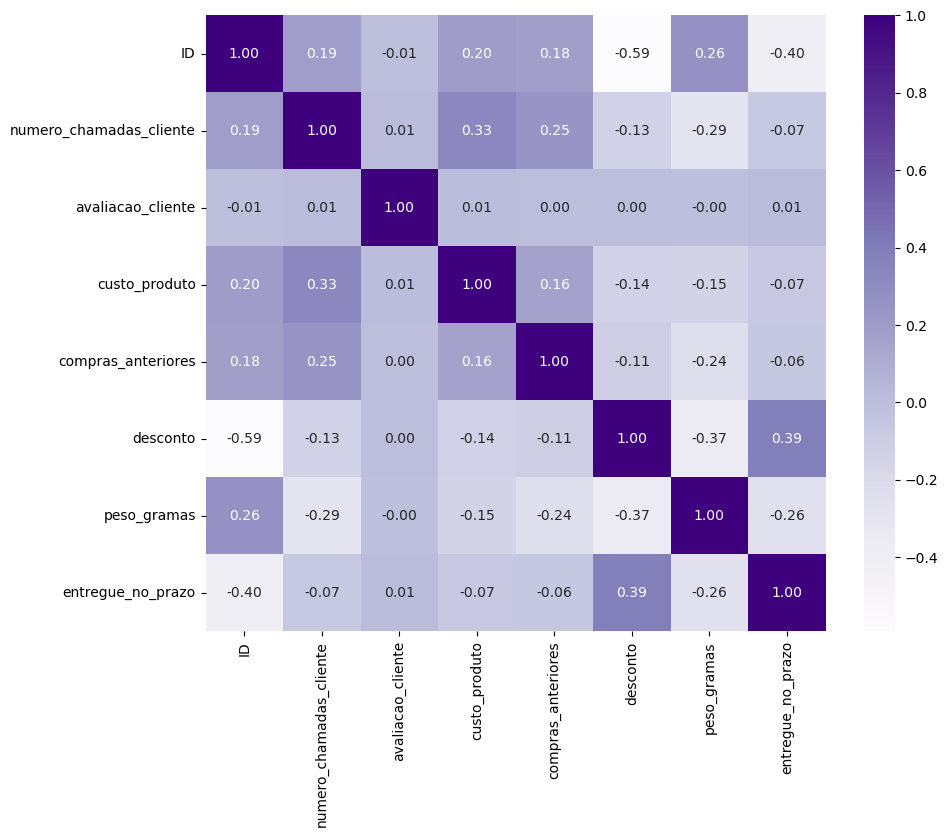

In [40]:
# Variáveis numéricas:
# Mapa de correlação
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f')

Descisão:
Na figura acima, os recursos que ultrapassam o limite (+/-0,05) na correlação com o recusto de destino (entregue_no_prazo) serão escolhidos para serem processados na Engenharia de Atributos, nesse caso: numero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas.

A variável avaliacao_cliente não parece relevante e não será processada. A variável ID será descartada, pois não representa informação útil.

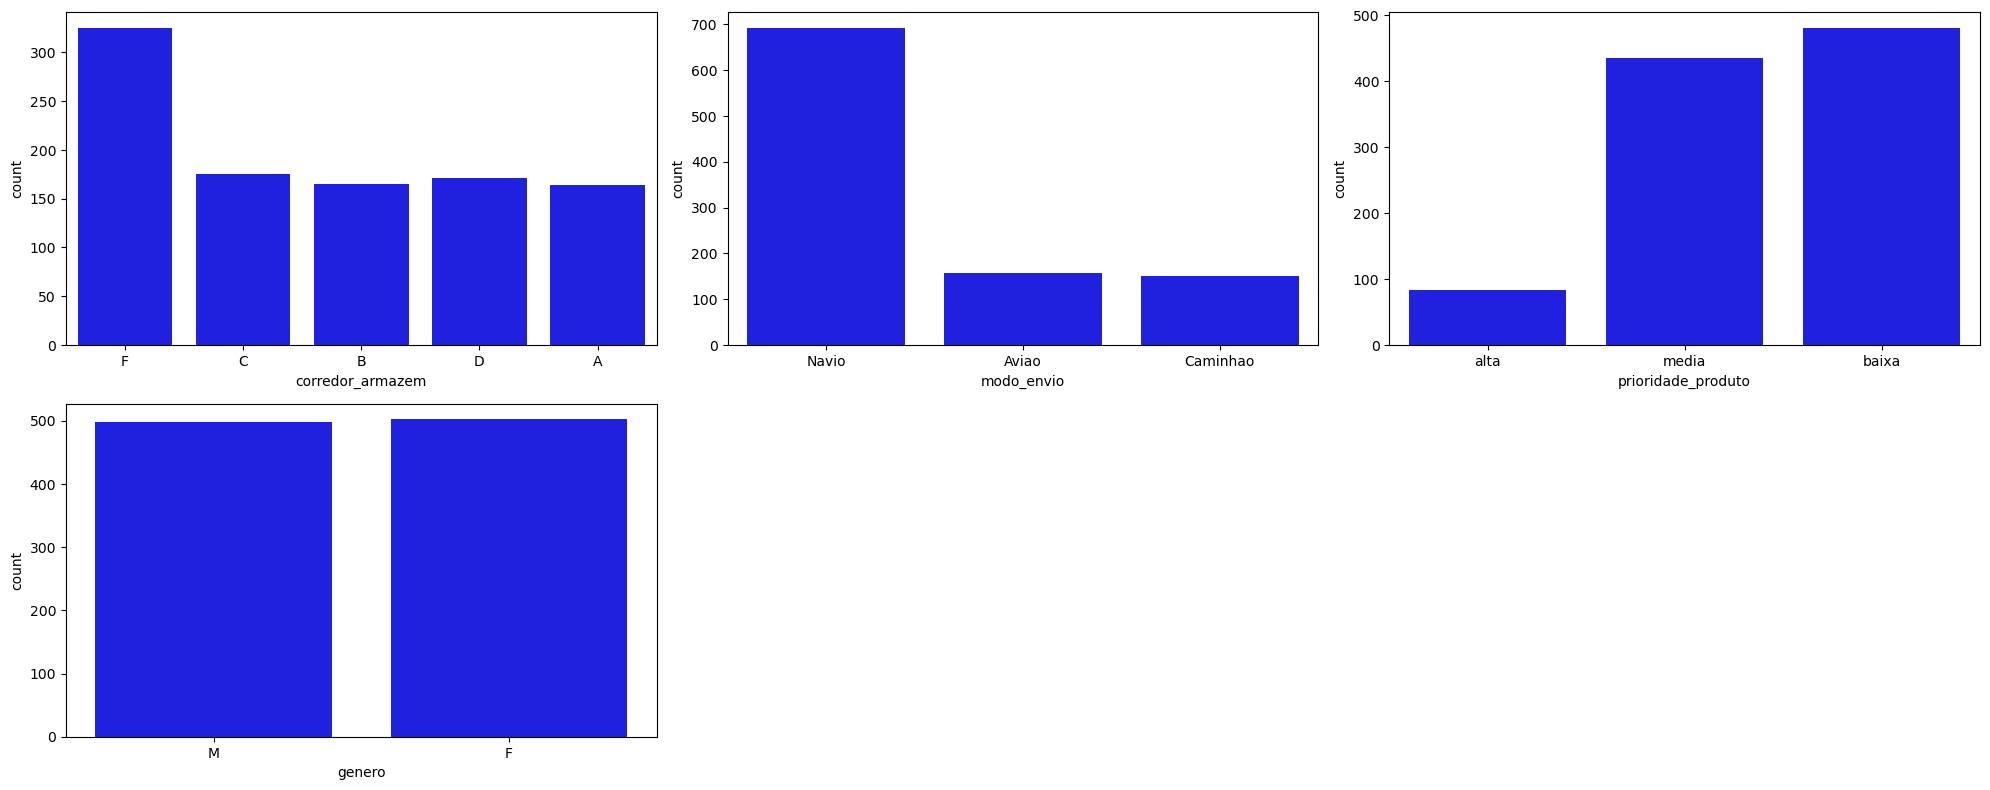

In [41]:
# Variáveis categóricas:
# Gráfico de barras
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20, 8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

Decisão:
Na figura acima pode-se verificar que todas as variáveis categóricas possuem uma diferença bastante grande em termos de contagens das classes, exceto a variável genero. Sendo assim, vamos desconsiderá-la na Engenharia de Atributos. 

### A Enhegeria de Atributos demonstrada abaixo será apenas com algumas colunas do dataset, devido a complexididade das tarefas 

## Feature Extraction

Aqui fazemos a extração de novas variáveis a partir da informação contida em outras varáveis.

In [42]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [43]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [44]:
# Cria uma copia do dataframe (boa prática)
df_eng = df.copy()

In [45]:
df_eng.shape

(10643, 12)

In [46]:
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### 1 - Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.



In [47]:
df_eng['prioridade_produto'].value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [48]:
# Criamos a variável e preenchemos com nan
df_eng['performance_prioridade_envio'] = np.nan

In [49]:
# Preenchendo a coluna que criamos e verificando se sobra algum nan (que não pode!)
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Ruim', 'Excelente')

In [50]:
df_eng['performance_prioridade_envio'].value_counts()

Excelente    10333
Ruim           310
Name: performance_prioridade_envio, dtype: int64

In [51]:
# Como queremos mais confições que apenas ruim e excelente, vamos zerar de novo a variável e ir para a solução completa
df_eng['performance_prioridade_envio'] = np.nan

In [52]:
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Atraso crítico',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Atraso problemárico',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Atraso tolerável',
    'Não houve atraso')))

In [53]:
df_eng['performance_prioridade_envio'].value_counts()

Não houve atraso       6282
Atraso tolerável       2134
Atraso problemárico    1917
Atraso crítico          310
Name: performance_prioridade_envio, dtype: int64

In [54]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
842,843,A,Navio,4,2,141,3,baixa,M,34,1619,1,Não houve atraso
1344,1345,D,Caminhao,3,4,147,3,baixa,F,2,1307,1,Não houve atraso
6819,6820,B,Navio,6,5,261,4,baixa,F,9,1266,1,Não houve atraso
2395,2396,F,Navio,3,3,179,3,media,F,12,1125,1,Não houve atraso
3370,3371,C,Navio,4,5,151,4,media,M,3,5470,0,Atraso problemárico


In [55]:
# Agrupamos os dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso crítico,0,310
1,Atraso problemárico,0,1917
2,Atraso tolerável,0,2134
3,Não houve atraso,1,6282


In [56]:
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso crítico,0,310
1,Atraso problemárico,0,1917
2,Atraso tolerável,0,2134
3,Não houve atraso,1,6282


In [57]:
# Pivot
df_report1 = pd.pivot_table(df_report1,
                           index = 'performance_prioridade_envio',
                           columns = 'entregue_no_prazo',
                           values = 'contagem').reset_index()
df_report1

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso crítico,310.0,NaN
1,Atraso problemárico,1917.0,NaN
2,Atraso tolerável,2134.0,NaN
3,Não houve atraso,NaN,6282.0


In [58]:
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso crítico,310.0,NaN
1,Atraso problemárico,1917.0,NaN
2,Atraso tolerável,2134.0,NaN
3,Não houve atraso,NaN,6282.0


In [59]:
# Replace do valor nan por zero
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso crítico,310.0,0.0
1,Atraso problemárico,1917.0,0.0
2,Atraso tolerável,2134.0,0.0
3,Não houve atraso,0.0,6282.0


In [60]:
# Somamos as duas colunas numéricas de forma que fique apenas uma coluna com a informação
df_report1['Total'] = df_report1['Total Atraso'] + df_report1['Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso crítico,310.0,0.0,310.0
1,Atraso problemárico,1917.0,0.0,1917.0
2,Atraso tolerável,2134.0,0.0,2134.0
3,Não houve atraso,0.0,6282.0,6282.0


In [61]:
# Não precisamos mais das colunas usadas na concatenação. Vamos removê-las.
df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1

,Status do Envio,Total
0,Atraso crítico,310.0
1,Atraso problemárico,1917.0
2,Atraso tolerável,2134.0
3,Não houve atraso,6282.0


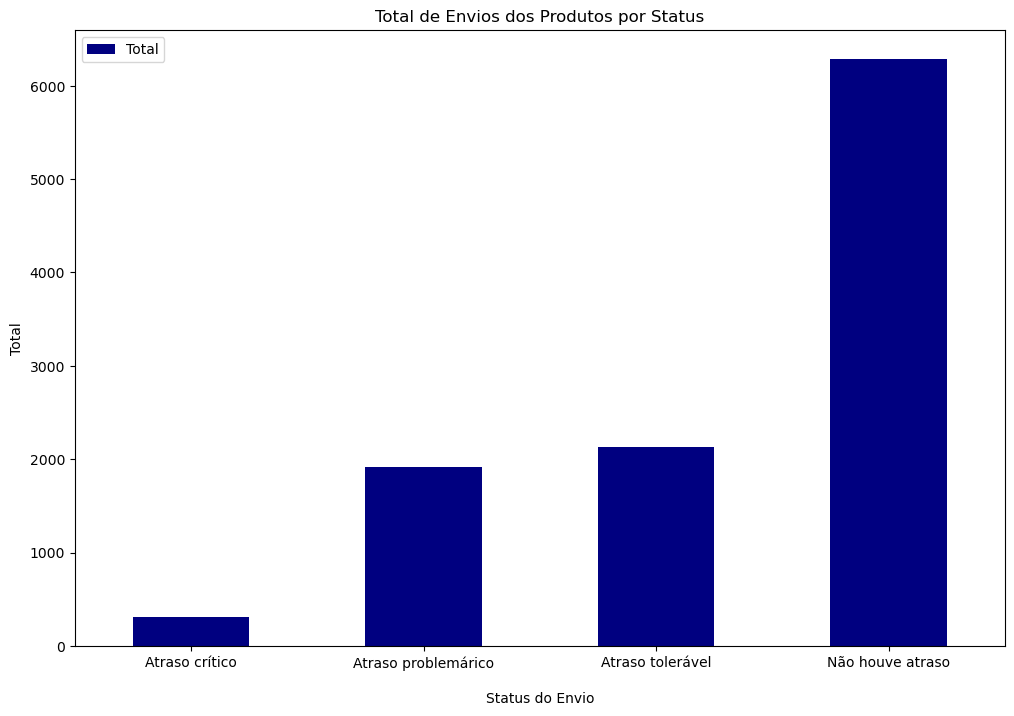

In [62]:
# Plot
df_report1.set_index('Status do Envio').plot(kind = 'bar',
                title = 'Total de Envios dos Produtos por Status',
                ylabel = 'Total',
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(12,8))
plt.xticks(rotation = 0)
plt.show()

## 2- Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio
O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é - problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.



In [63]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [64]:
df_eng['modo_envio'].value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [65]:
# Solução
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico na Entrega por Navio',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático na Entrega por Navio',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável na Entrega por Navio',
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico na Entrega por Aviao',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático na Entrega por Aviao',
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável na Entrega por Aviao',
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico na Entrega por Caminhao',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático na Entrega por Caminhao',
    np.where(
        (df_eng['prioridade_produto'] == 'baixo') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável na Entrega por Caminhao',
    'Não houve atraso')))))))))

In [66]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
7438,7439,C,Navio,3,5,275,4,media,M,10,5066,0,Atraso problemárico,Atraso Problemático na Entrega por Navio
4536,4537,D,Aviao,4,2,266,3,alta,M,1,5532,1,Não houve atraso,Não houve atraso
1634,1635,A,Caminhao,6,3,241,6,alta,F,8,3878,1,Não houve atraso,Não houve atraso
7800,7801,D,Caminhao,4,5,192,2,alta,F,4,4518,0,Atraso crítico,Atraso Crítico na Entrega por Caminhao
8900,8901,A,Aviao,7,2,284,4,baixa,F,1,1085,1,Não houve atraso,Não houve atraso


In [67]:
df_eng['performance_modo_envio'].value_counts()

Não houve atraso                               6632
Atraso Tolerável na Entrega por Navio          1453
Atraso Problemático na Entrega por Navio       1307
Atraso Tolerável na Entrega por Aviao           331
Atraso Problemático na Entrega por Caminhao     310
Atraso Problemático na Entrega por Aviao        300
Atraso Crítico na Entrega por Navio             194
Atraso Crítico na Entrega por Aviao              65
Atraso Crítico na Entrega por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [68]:
df_eng['performance_modo_envio'].isna().sum()

0

In [69]:
df_report2 = df_eng.groupby(['performance_modo_envio',
                            'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega por Aviao,0,65
1,Atraso Crítico na Entrega por Caminhao,0,51
2,Atraso Crítico na Entrega por Navio,0,194
3,Atraso Problemático na Entrega por Aviao,0,300
4,Atraso Problemático na Entrega por Caminhao,0,310
5,Atraso Problemático na Entrega por Navio,0,1307
6,Atraso Tolerável na Entrega por Aviao,0,331
7,Atraso Tolerável na Entrega por Navio,0,1453
8,Não houve atraso,0,350


In [70]:
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega por Aviao,0,65
1,Atraso Crítico na Entrega por Caminhao,0,51
2,Atraso Crítico na Entrega por Navio,0,194
3,Atraso Problemático na Entrega por Aviao,0,300
4,Atraso Problemático na Entrega por Caminhao,0,310
5,Atraso Problemático na Entrega por Navio,0,1307
6,Atraso Tolerável na Entrega por Aviao,0,331
7,Atraso Tolerável na Entrega por Navio,0,1453
8,Não houve atraso,0,350
9,Não houve atraso,1,6282


In [71]:
# Pivot
df_report2 = pd.pivot_table(df_report2,
                            index = 'performance_modo_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report2.head(10)

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega por Aviao,65.0,NaN
1,Atraso Crítico na Entrega por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega por Navio,194.0,NaN
3,Atraso Problemático na Entrega por Aviao,300.0,NaN
4,Atraso Problemático na Entrega por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega por Navio,1453.0,NaN
8,Não houve atraso,350.0,6282.0


In [72]:
df_report2.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega por Aviao,65.0,NaN
1,Atraso Crítico na Entrega por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega por Navio,194.0,NaN
3,Atraso Problemático na Entrega por Aviao,300.0,NaN
4,Atraso Problemático na Entrega por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega por Navio,1453.0,NaN
8,Não houve atraso,350.0,6282.0


In [73]:
# Replace do valor nan por zero
df_report2['Total Atraso'] = df_report2['Total Atraso'].replace(np.nan, 0)
df_report2['Total no Prazo'] = df_report2['Total no Prazo'].replace(np.nan, 0)
df_report2.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega por Aviao,65.0,0.0
1,Atraso Crítico na Entrega por Caminhao,51.0,0.0
2,Atraso Crítico na Entrega por Navio,194.0,0.0
3,Atraso Problemático na Entrega por Aviao,300.0,0.0
4,Atraso Problemático na Entrega por Caminhao,310.0,0.0


In [74]:
df_report2['Total'] = df_report2['Total Atraso'] + df_report2['Total no Prazo']
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico na Entrega por Aviao,65.0,0.0,65.0
1,Atraso Crítico na Entrega por Caminhao,51.0,0.0,51.0
2,Atraso Crítico na Entrega por Navio,194.0,0.0,194.0
3,Atraso Problemático na Entrega por Aviao,300.0,0.0,300.0
4,Atraso Problemático na Entrega por Caminhao,310.0,0.0,310.0
5,Atraso Problemático na Entrega por Navio,1307.0,0.0,1307.0
6,Atraso Tolerável na Entrega por Aviao,331.0,0.0,331.0
7,Atraso Tolerável na Entrega por Navio,1453.0,0.0,1453.0
8,Não houve atraso,350.0,6282.0,6632.0


In [75]:
# Não precisamos mais das colunas usadas na concatenação. Vamos removê-las.
df_report2.drop(df_report2.columns[[1, 2]], axis = 1, inplace = True)
df_report2

,Status do Envio,Total
0,Atraso Crítico na Entrega por Aviao,65.0
1,Atraso Crítico na Entrega por Caminhao,51.0
2,Atraso Crítico na Entrega por Navio,194.0
3,Atraso Problemático na Entrega por Aviao,300.0
4,Atraso Problemático na Entrega por Caminhao,310.0
5,Atraso Problemático na Entrega por Navio,1307.0
6,Atraso Tolerável na Entrega por Aviao,331.0
7,Atraso Tolerável na Entrega por Navio,1453.0
8,Não houve atraso,6632.0


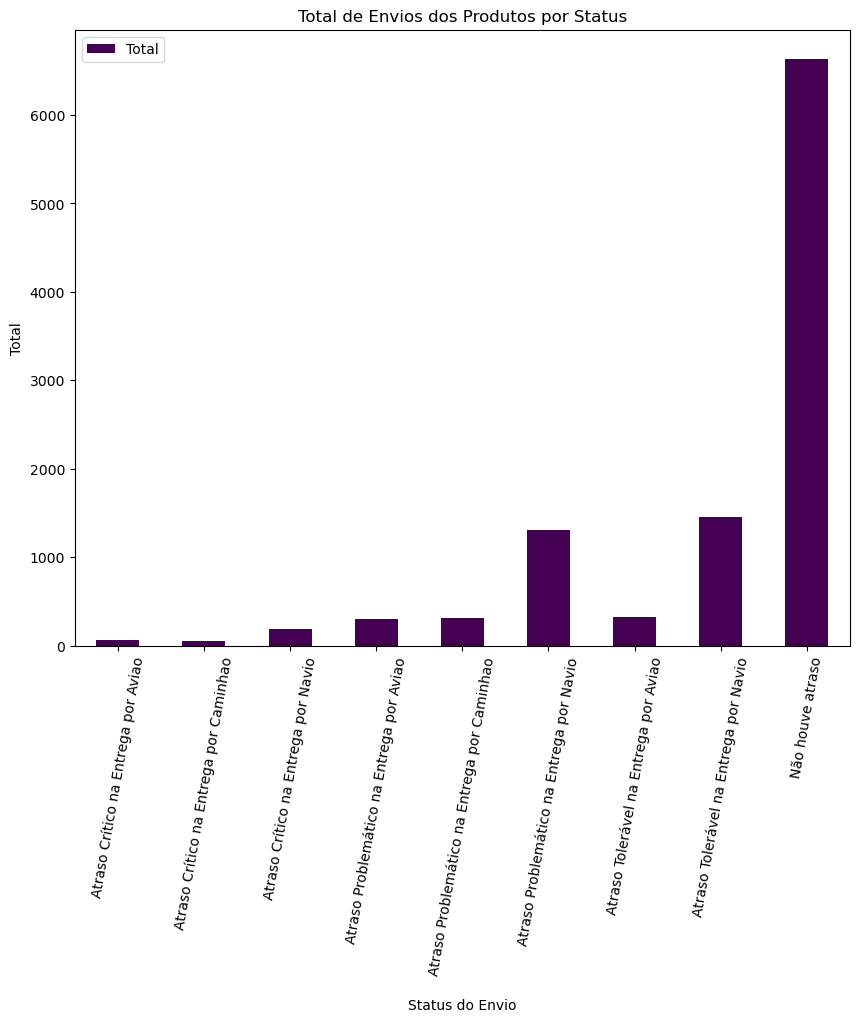

In [76]:
# Plot
df_report2.set_index('Status do Envio').plot(kind = 'bar',
                title = 'Total de Envios dos Produtos por Status',
                ylabel = 'Total',
                xlabel = '\nStatus do Envio',
                colormap = 'viridis',
                figsize = (10, 8))
plt.xticks(rotation = 80)
plt.show()

### 3- Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Criaremos duas novas variáveis com base na seguinte regra de negócio:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [109]:
df_eng['desconto'].mean()

12.528046603401297

In [110]:
# Criando a variável faixa_desconto
df_eng['faixa_desconto'] = np.where(
    df_eng['desconto'] >= 12, 'Desconto acima ou igual à média', 'Desconto abaixo da média')
df_eng.head(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não houve atraso,Não houve atraso,Desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Média
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
5,6,F,Aviao,3,1,162,3,media,F,12,1417,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
6,7,D,Aviao,3,4,250,3,baixa,F,3,2371,1,Não houve atraso,Não houve atraso,Desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Média
7,8,F,Aviao,4,1,233,2,baixa,F,48,2804,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
8,9,A,Aviao,3,4,150,3,baixa,F,11,1861,1,Não houve atraso,Não houve atraso,Desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Média
9,10,B,Aviao,3,2,164,3,media,F,29,1187,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média


In [111]:
df_eng['faixa_desconto'].value_counts()

Desconto abaixo da média           8269
Desconto acima ou igual à média    2374
Name: faixa_desconto, dtype: int64

In [112]:
# Criando a variáveil performance_faixa_desconto
df_eng['performance_faixa_desconto'] = np.where(
        (df_eng['faixa_desconto'] == 'Desconto acima ou igual à média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Acima da Média',
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto acima ou igual à média') & (df_eng['entregue_no_prazo'] == 1), 'Entrega no Prazo com Desconto Acima da Média',
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto abaixo da média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Abaixo da Média',
    np.where(    
        (df_eng['faixa_desconto'] == 'Desconto abaixo da média') & (df_eng['entregue_no_prazo'] == 1), 'Entrega no Prazo com Desconto Abaixo da Média',
    'NA'))))

In [113]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não houve atraso,Não houve atraso,Desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Média
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média


In [114]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Média    4361
Entrega no Prazo com Desconto Abaixo da Média     3908
Entrega no Prazo com Desconto Acima da Média      2374
Name: performance_faixa_desconto, dtype: int64

In [115]:
# Agrupamos os dados para análise
df_report3 = df_eng.groupby(['performance_faixa_desconto',
                            'entregue_no_prazo']).agg({'ID': ['count']}).reset_index()
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,ID
,,,count
0,Atraso na Entrega com Desconto Abaixo da Média,0,4361
1,Entrega no Prazo com Desconto Abaixo da Média,1,3908
2,Entrega no Prazo com Desconto Acima da Média,1,2374


In [116]:
df_report3.columns = ['performance_faixa_desconto', 'entregue_no_prazo', 'contagem']
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,contagem
0,Atraso na Entrega com Desconto Abaixo da Média,0,4361
1,Entrega no Prazo com Desconto Abaixo da Média,1,3908
2,Entrega no Prazo com Desconto Acima da Média,1,2374


In [117]:
# Pivot
df_report3 = pd.pivot_table(df_report3,
                            index = 'performance_faixa_desconto',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report3.head()

entregue_no_prazo,performance_faixa_desconto,0,1
0,Atraso na Entrega com Desconto Abaixo da Média,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Média,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Média,NaN,2374.0


In [118]:
df_report3.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Média,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Média,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Média,NaN,2374.0


In [119]:
df_report3['Total Atraso'] = df_report3['Total Atraso'].replace(np.nan, 0)
df_report3['Total no Prazo'] = df_report3['Total no Prazo'].replace(np.nan, 0)
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Média,4361.0,0.0
1,Entrega no Prazo com Desconto Abaixo da Média,0.0,3908.0
2,Entrega no Prazo com Desconto Acima da Média,0.0,2374.0


In [121]:
# Somando as colunas
df_report3['Total'] = df_report3['Total Atraso'] + df_report3['Total no Prazo']
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso na Entrega com Desconto Abaixo da Média,4361.0,0.0,4361.0
1,Entrega no Prazo com Desconto Abaixo da Média,0.0,3908.0,3908.0
2,Entrega no Prazo com Desconto Acima da Média,0.0,2374.0,2374.0


In [122]:
df_report3.drop(df_report3.columns[[1, 2]], axis = 1, inplace = True)
df_report3

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Média,4361.0
1,Entrega no Prazo com Desconto Abaixo da Média,3908.0
2,Entrega no Prazo com Desconto Acima da Média,2374.0


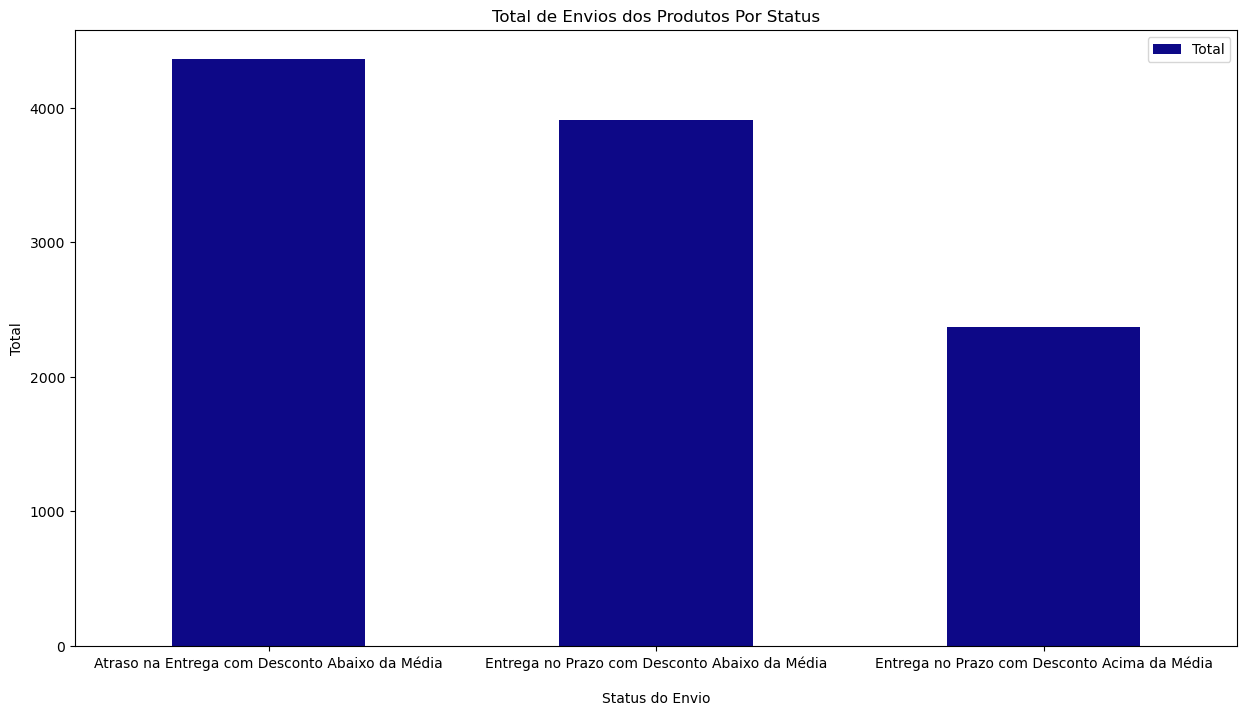

In [125]:
# Plot
df_report3.set_index('Status do Envio').plot(kind = 'bar',
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total',
                xlabel = '\nStatus do Envio',
                colormap = 'plasma',
                figsize = (15,8))
plt.xticks(rotation = 0)
plt.show()

In [126]:
df_eng.sample(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
1047,1048,B,Navio,3,4,257,3,media,M,56,2941,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
8587,8588,F,Navio,4,5,239,3,baixa,M,6,5154,1,Não houve atraso,Não houve atraso,Desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Média
6768,6769,D,Navio,4,1,100,6,media,M,6,5841,0,Atraso problemárico,Atraso Problemático na Entrega por Navio,Desconto abaixo da média,Atraso na Entrega com Desconto Abaixo da Média
3649,3650,F,Navio,5,4,266,6,baixa,F,5,5481,0,Atraso tolerável,Atraso Tolerável na Entrega por Navio,Desconto abaixo da média,Atraso na Entrega com Desconto Abaixo da Média
4158,4159,D,Navio,2,4,100,4,baixa,M,3,5398,0,Atraso tolerável,Atraso Tolerável na Entrega por Navio,Desconto abaixo da média,Atraso na Entrega com Desconto Abaixo da Média
4650,4651,D,Caminhao,3,2,180,2,alta,F,8,4408,0,Atraso crítico,Atraso Crítico na Entrega por Caminhao,Desconto abaixo da média,Atraso na Entrega com Desconto Abaixo da Média
107,108,F,Navio,4,5,216,3,alta,M,26,2053,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
3313,3314,F,Navio,4,4,212,2,media,F,6,4117,1,Não houve atraso,Não houve atraso,Desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Média
1965,1966,B,Navio,3,4,226,3,media,F,26,2299,1,Não houve atraso,Não houve atraso,Desconto acima ou igual à média,Entrega no Prazo com Desconto Acima da Média
7387,7388,F,Caminhao,4,1,157,7,baixa,F,7,4385,0,Atraso tolerável,Não houve atraso,Desconto abaixo da média,Atraso na Entrega com Desconto Abaixo da Média


In [128]:
# Salva o dataframe
df_eng.to_csv('df_eng.csv', sep = ',', encoding = 'utf-8')